Modules

In [1]:
# Import modules
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from cenpy import products
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from shapely.geometry import Point
from sklearn.linear_model import LinearRegression

Set Up

In [2]:
# Define product
acs = products.ACS(2019)

## View data <br>
https://api.census.gov/data/2019/acs/acs5/variables.html

In [3]:
# Download data
    # the v list is a list of the names of variables you want to input that then goes into the data pull
    # the level is 
v = []
counter = 1
while counter < 10:
    col = 'B08012_00'+str(counter)+'E'
    v.append(col)
    counter += 1

while counter < 40:
    col = 'B08012_0'+str(counter)+'E'
    v.append(col)
    counter += 1
    
v.append('B08013_001E')
v.append('B08013_002E')
v.append('B08013_003E')

In [4]:
new_table = products.ACS(2019).from_county('Harris County, TX', level='tract', variables=v)

C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter i

<AxesSubplot:>

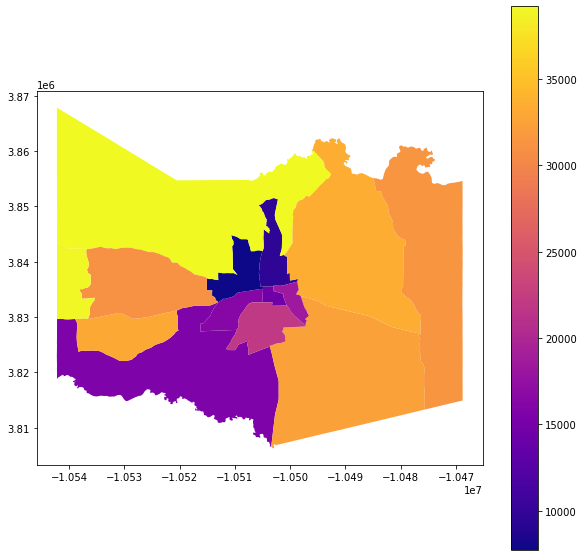

In [5]:
# Plot map of a given column
f, ax = plt.subplots(1, 1, figsize=(10,10))
new_table.plot('B08013_002E', ax=ax, cmap='plasma', legend=True)

<AxesSubplot:>

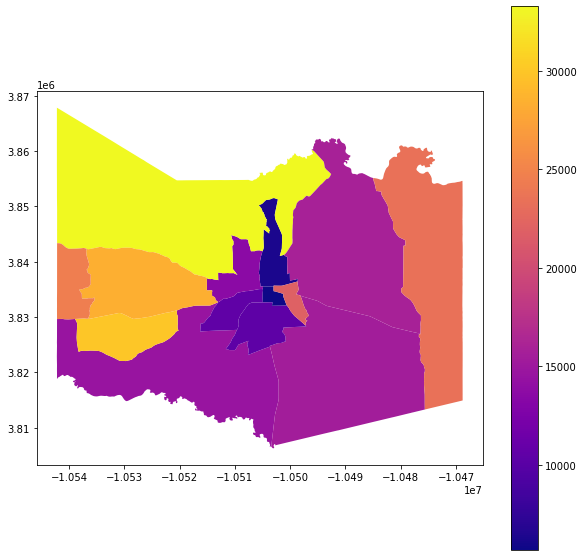

In [6]:
# Plot map of a given column
f, ax = plt.subplots(1, 1, figsize=(10,10))
new_table.plot('B08013_003E', ax=ax, cmap='plasma', legend=True)

Columns of note: <br>
B08012_001E = Total number of people polled per tract <br>
B08012_014E = Total number of men per tract <br>
B08012_027E = Total number of women per tract <br>
B08012_012E + B08012_013E = Total numer of workers with a travel time > 60 minutes <br>
B08012_025E + B08012_026E = Total numer of men with a travel time > 60 minutes <br>
B08012_038E + B08012_039E = Total numer of women with a travel time > 60 minutes <br>
B08013_001E = Aggregate travel hours <br>
B08013_002E = Men's aggregate travel hours <br>
B08013_003E = Men's aggregate travel hours <br>

# Collect Variables

### *Base Variables*

In [7]:
def get_popmedian(gdf):
    infodict = {}
    
    for row in gdf.iterrows():
        pc = ['B08012_002E', 'B08012_003E', 'B08012_004E', 'B08012_005E', 'B08012_006E', 'B08012_007E', 'B08012_008E', 'B08012_009E', 'B08012_010E', 'B08012_011E', 'B08012_012E', 'B08012_013E']
        people = int(row[1][2])
        hpeople = people // 2
        currcol = ''
        
        while hpeople > 0:
            currcol = pc.pop(0)
            value = new_table[currcol][row[0]]
            hpeople = hpeople - value # subtract the number of people in that category from the total
            
        infodict[row[1][47]] = currcol
        
    return infodict

def get_menmedian(gdf):
    infodict = {}
    
    for row in gdf.iterrows():
        pc = ['B08012_015E', 'B08012_016E', 'B08012_017E', 'B08012_018E', 'B08012_019E', 'B08012_020E', 'B08012_021E', 'B08012_022E', 'B08012_023E', 'B08012_024E', 'B08012_025E', 'B08012_026E']
        men = int(row[1][15])
        hmen = men // 2
        currcol = ''
        #print('new row', currcol)
        
        while hmen > 0:
            currcol = pc.pop(0)
            value = new_table[currcol][row[0]]
            hmen = hmen - value # subtract the number of people in that category from the total
            
        #print('end while', currcol)
        infodict[row[1][47]] = currcol
        
    return infodict


def get_womenmedian(gdf):
    infodict = {}
    
    for row in gdf.iterrows():
        pc = ['B08012_028E', 'B08012_029E', 'B08012_030E', 'B08012_031E', 'B08012_032E', 'B08012_033E', 'B08012_034E', 'B08012_035E', 'B08012_036E', 'B08012_037E', 'B08012_038E', 'B08012_039E']
        women = int(row[1][28])
        hwomen = women // 2
        currcol = ''
        #print('new row', currcol)
        
        while hwomen > 0:
            #print('while   half women =', hwomen)
            currcol = pc.pop(0)
            value = new_table[currcol][row[0]]
            hwomen = hwomen - value # subtract the number of people in that category from the total
            
        #print('end while', currcol)
        infodict[row[1][47]] = currcol
        
    return infodict

B08012_004 = 10-14 <br>
B08012_005 = 15-19 <br>
B08012_006 = 20-24 <br>
B08012_007 = 25-29 <br>
B08012_008 = 30-34 <br>

In [8]:
population_median_cols = get_popmedian(new_table)
population_median = ['15-19', '15-19', '10-14', '15-19', '20-24', '10-14', '20-24', '25-29', '10-14', '20-24', '25-29', '30-34', '10-14', '20-24']
population_median_cols

{'020604': 'B08012_005E',
 '020402': 'B08012_005E',
 '020501': 'B08012_004E',
 '020302': 'B08012_005E',
 '020603': 'B08012_006E',
 '020401': 'B08012_004E',
 '020103': 'B08012_006E',
 '020200': 'B08012_007E',
 '020502': 'B08012_004E',
 '020605': 'B08012_006E',
 '020104': 'B08012_007E',
 '020102': 'B08012_008E',
 '020301': 'B08012_004E',
 '020606': 'B08012_006E'}

B08012_017 = 10-14 <br>
B08012_018 = 15-19 <br>
B08012_019 = 20-24 <br>
B08012_020 = 25-29 <br>
B08012_021 = 30-35 <br>

In [9]:
men_median_cols = get_menmedian(new_table)
men_median = ['15-19', '15-19', '15-19', '15-19', '20-24', '10-14', '25-29', '25-29', '15-19', '20-24', '30-34', '30-34', '10-14', '20-24']
men_median_cols

{'020604': 'B08012_018E',
 '020402': 'B08012_018E',
 '020501': 'B08012_018E',
 '020302': 'B08012_018E',
 '020603': 'B08012_019E',
 '020401': 'B08012_017E',
 '020103': 'B08012_020E',
 '020200': 'B08012_020E',
 '020502': 'B08012_018E',
 '020605': 'B08012_019E',
 '020104': 'B08012_021E',
 '020102': 'B08012_021E',
 '020301': 'B08012_017E',
 '020606': 'B08012_019E'}

B08012_029 = 5-9 <br>
B08012_030 = 10-14 <br>
B08012_031 = 15-19 <br>
B08012_032 = 20-24 <br>
B08012_033 = 25-29 <br>
B08012_034 = 30-34 <br>

In [10]:
women_median_cols = get_womenmedian(new_table)
women_median = ['15-19', '10-14', '5-9', '15-19', '20-24', '10-14', '15-19', '25-29', '10-14', '20-24', '20-24', '30-34', '10-14', '20-24']
women_median_cols

{'020604': 'B08012_031E',
 '020402': 'B08012_030E',
 '020501': 'B08012_029E',
 '020302': 'B08012_031E',
 '020603': 'B08012_032E',
 '020401': 'B08012_030E',
 '020103': 'B08012_031E',
 '020200': 'B08012_033E',
 '020502': 'B08012_030E',
 '020605': 'B08012_032E',
 '020104': 'B08012_032E',
 '020102': 'B08012_034E',
 '020301': 'B08012_030E',
 '020606': 'B08012_032E'}

In [11]:
base = pd.DataFrame()
# Adding columns to model table
base['GEOID'] = new_table['GEOID']
base['geometry'] = new_table['geometry']
base['NAME'] = new_table['NAME']
base['state'] = new_table['state']
base['county'] = new_table['county']
base['tract'] = new_table['tract']
base['population_median'] = population_median
base['men_median'] = men_median
base['women_median'] = women_median

### *Explanatory Variables*

In [12]:
# Import variables
explanatory = products.ACS(2019).from_county('Harris County, TX', level='tract', variables=['B19052_001E', 'B19052_002E', 'B28002_002E', 'B28002_001E', 'B01001B_001E', 'B01001_001E', 'B20002_001E', 'B08124_001E', 'B08124_008E', 'B08124_015E', 'B08124_022E', 'B08124_029E', 'B08124_036E', 'B08124_043E', 'B27019_001E', 'B27019_004E', 'B27019_009E', 'B27019_014E', 'B27019_019E'])

C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter i

In [13]:
# people that have a wage or salary income
p_salary = (explanatory['B19052_002E']/explanatory['B19052_001E'])
base['p_salary'] = p_salary

In [14]:
# percentage of people with internet access
p_has_internet = explanatory['B28002_002E'] / explanatory['B28002_001E']
base['p_has_internet'] = p_has_internet

In [15]:
# percentage of black people B01001B_001E
p_black = explanatory['B01001B_001E'] / explanatory['B01001_001E']
base['p_black'] = p_black

In [16]:
# median total earnings B20002_001E
base['med_total_earnings'] = explanatory['B20002_001E']

In [17]:
# total B08124_001E
# percent drove alone to work B08124_008E
# percent drove carpooled B08124_015E
# percent public transportation B08124_022E
# percent walked B08124_029E
# percent bicycle/motorcycle/taxi/other B08124_036E
# percent worked from home B08124_043E

p_drovealone = explanatory['B08124_008E'] / explanatory['B08124_001E']
p_carpool = explanatory['B08124_015E'] / explanatory['B08124_001E']
p_publictrans = explanatory['B08124_022E'] / explanatory['B08124_001E']
p_walked = explanatory['B08124_029E'] / explanatory['B08124_001E']
p_bikemotorother = explanatory['B08124_036E'] / explanatory['B08124_001E']
p_workfromhome = explanatory['B08124_043E'] / explanatory['B08124_001E']

base['p_drovealone'] = p_drovealone
base['p_carpool'] = p_carpool
base['p_publictrans'] = p_publictrans
base['p_walked'] = p_walked
base['p_bikemotorother'] = p_bikemotorother
base['p_workfromhome'] = p_workfromhome

In [18]:
# percent with health insurance 26-64
p_healthinsurance = (explanatory['B27019_004E'] + explanatory['B27019_009E'] + explanatory['B27019_014E'] + explanatory['B27019_019E']) / explanatory['B27019_001E']
base['p_healthinsurance'] = p_healthinsurance

In [19]:
pm_int = []
for item in population_median:
    if item == '5-9':
        pm_int.append(7)
        
    elif item == '10-14':
        pm_int.append(12)
        
    elif item == '15-19':
        pm_int.append(17)
        
    elif item == '20-24':
        pm_int.append(22)
        
    elif item == '25-29':
        pm_int.append(27)
        
    elif item == '30-34':
        pm_int.append(32)
        
base['pm_int'] = pm_int

In [20]:
wm_int = []
for item in women_median:
    if item == '5-9':
        wm_int.append(7)
        
    elif item == '10-14':
        wm_int.append(12)
        
    elif item == '15-19':
        wm_int.append(17)
        
    elif item == '20-24':
        wm_int.append(22)
        
    elif item == '25-29':
        wm_int.append(27)
        
    elif item == '30-34':
        wm_int.append(32)
        
base['wm_int'] = wm_int

In [21]:
mm_int = []
for item in men_median:
    if item == '5-9':
        mm_int.append(7)
        
    elif item == '10-14':
        mm_int.append(12)
        
    elif item == '15-19':
        mm_int.append(17)
        
    elif item == '20-24':
        mm_int.append(22)
        
    elif item == '25-29':
        mm_int.append(27)
        
    elif item == '30-34':
        mm_int.append(32)
        
    else:
        mm_int.append('problem')
        
base['mm_int'] = mm_int

# Analysis

### *Regression Analysis*

In [22]:
# Compute correlation matrix
feature_list =  ['pm_int','mm_int','wm_int','p_carpool', 'p_has_internet', 'p_healthinsurance', 'med_total_earnings', 'p_drovealone', 'p_salary', 'p_walked', 'p_workfromhome', 'p_bikemotorother', 'p_black']
corr_matrix = base[feature_list].corr()

In [23]:
corr_matrix['pm_int'].sort_values(ascending = False)

pm_int                1.000000
wm_int                0.939520
mm_int                0.935032
p_carpool             0.365044
p_has_internet        0.263626
p_healthinsurance     0.248170
med_total_earnings    0.240417
p_drovealone         -0.045760
p_salary             -0.056781
p_walked             -0.202142
p_workfromhome       -0.234144
p_bikemotorother     -0.235797
p_black              -0.396460
Name: pm_int, dtype: float64

In [24]:
corr_matrix.loc['mm_int',:].sort_values(ascending = True)

p_black              -0.399368
p_walked             -0.307569
p_workfromhome       -0.299316
p_bikemotorother     -0.163685
p_salary             -0.070714
p_drovealone         -0.038123
p_healthinsurance     0.128535
p_has_internet        0.227523
med_total_earnings    0.263632
p_carpool             0.400102
wm_int                0.798898
pm_int                0.935032
mm_int                1.000000
Name: mm_int, dtype: float64

In [25]:
corr_matrix.loc['wm_int',:].sort_values(ascending = True)

p_black              -0.508800
p_workfromhome       -0.211461
p_bikemotorother     -0.173689
p_walked             -0.132188
p_drovealone         -0.120626
p_salary             -0.082084
med_total_earnings    0.258892
p_healthinsurance     0.311710
p_carpool             0.386969
p_has_internet        0.387064
mm_int                0.798898
pm_int                0.939520
wm_int                1.000000
Name: wm_int, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


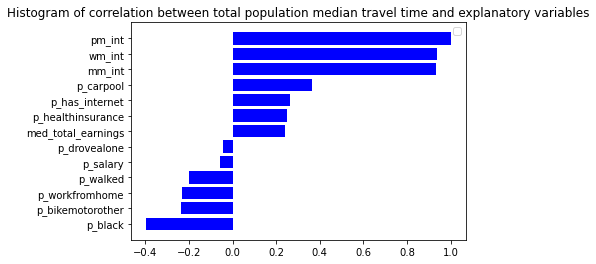

In [26]:
width = 0.8
corr_matrix_sub = corr_matrix.loc['pm_int',:].sort_values(ascending = True)
plt.barh(range(0, len(feature_list)), corr_matrix_sub, height = width, color = 'b')
#plt.bar(2, base['pm_int'], width = width, color = 'r', alpha = 0.5, label = 'Median travel time in the entire population')
plt.yticks(np.array(range(0, len(feature_list))), corr_matrix_sub.index)
plt.legend()
plt.title('Histogram of correlation between total population median travel time and explanatory variables')
plt.show()

### *Model*

In [27]:
# Define feature list
feature_list =  ['p_carpool', 'p_has_internet', 'p_healthinsurance', 'med_total_earnings', 'p_drovealone', 'p_salary', 'p_walked', 'p_workfromhome', 'p_bikemotorother', 'p_black']

# Define features and labels 
X = base[feature_list]
y = base['pm_int']

# Standarize data
scaler = StandardScaler()  
scaler_fit = scaler.fit(X)
X_scaled = scaler_fit.transform(X)

In [28]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [29]:
# Define model
forest_reg = RandomForestRegressor(n_estimators = 300)

# Fit model
forest_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300)

In [30]:
# Predict test labels predictions
predictions = forest_reg.predict(X_test)

# Compute mean-squared-error
final_mse = mean_squared_error(y_test , predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

8.359220901141091

In [31]:
predictions = forest_reg.predict(X)


C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [32]:
linreg = LinearRegression().fit(X, y)
linreg_prediction = linreg.predict(X)

In [33]:
coefs_arr = np.hstack([np.array([linreg.intercept_]), linreg.coef_])

In [34]:
coln = ['Intercept', 'p_carpool', 'p_has_internet', 'p_healthinsurance', 'med_total_earnings', 'p_drovealone', 'p_salary', 'p_walked', 'p_workfromhome', 'p_bikemotorother', 'p_black']
pd.DataFrame({'Variable': coln, 'Coefficient': coefs_arr})

,Variable,Coefficient
0,Intercept,-79.839072
1,p_carpool,167.932683
2,p_has_internet,10.689345
3,p_healthinsurance,38.905217
4,med_total_earnings,-0.001062
5,p_drovealone,117.622579
6,p_salary,-0.578936
7,p_walked,-135.391135
8,p_workfromhome,16.309589
9,p_bikemotorother,-166.473715


In [35]:
# Compute mean-squared-error
final_mse = mean_squared_error(y , predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

6.1489949494928755

# VISUALIZATIONS

array([[<AxesSubplot:title={'center':'pm_int'}>]], dtype=object)

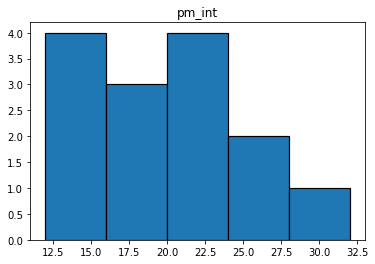

In [36]:
base[['pm_int']].hist(bins=5, edgecolor='black', linewidth=1.2, grid=False)

array([[<AxesSubplot:title={'center':'mm_int'}>]], dtype=object)

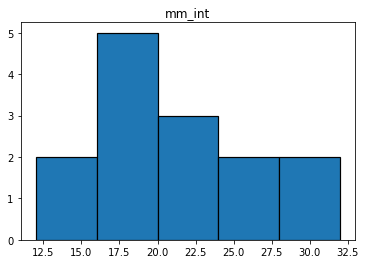

In [37]:
base[['mm_int']].hist(bins=5, edgecolor='black', linewidth=1.2, grid=False)

array([[<AxesSubplot:title={'center':'wm_int'}>]], dtype=object)

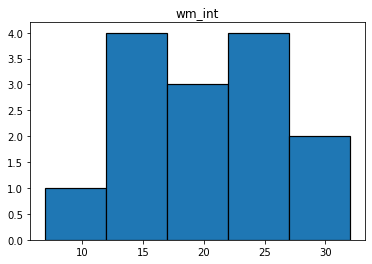

In [38]:
base[['wm_int']].hist(bins=5, edgecolor='black', linewidth=1.2, grid=False)

(0.0, 50.0)

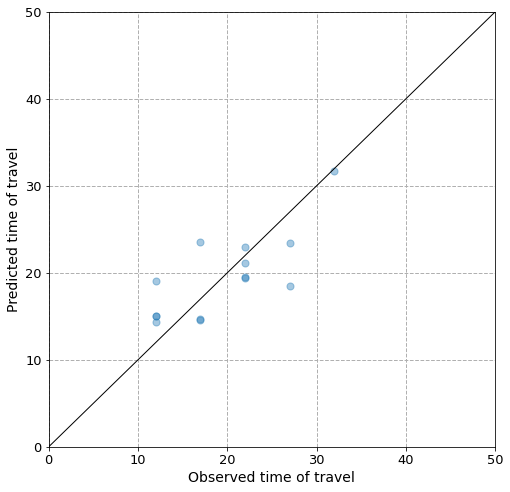

In [39]:
# Plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(y, linreg_prediction, alpha=0.4, s=50, zorder=2)
ax.plot([0, 80], [0, 80], color='k', lw=1, zorder=3)
ax.set_ylabel('Predicted time of travel', fontsize=14)
ax.set_xlabel('Observed time of travel', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.grid(ls='dashed', lw=1, zorder=1)
ax.set_ylim(0,50)
ax.set_xlim(0,50)

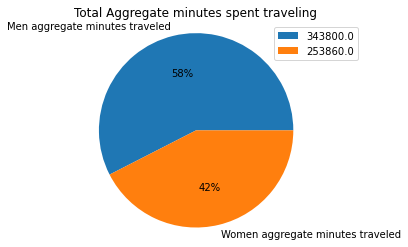

In [40]:
#width = 0.5

men_agg   = [343800.0]
women_agg = [253860.0]
pop_agg = [597665.0]

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Men aggregate minutes traveled', 'Women aggregate minutes traveled']
sizes = [343800.0, 253860.0]


fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%.0f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Total Aggregate minutes spent traveling')

plt.legend(sizes)
plt.show()

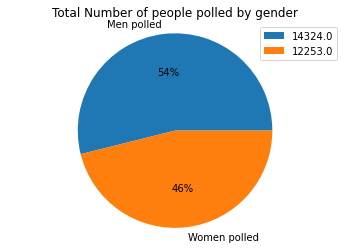

In [41]:
men = new_table['B08012_014E'].sum()
women = new_table['B08012_027E'].sum()

labels = ['Men polled', 'Women polled']
sizes = [men, women]


fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%.0f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Total Number of people polled by gender')

plt.legend(sizes)
plt.show()